In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [2]:
df = pd.read_csv('/content/drive/MyDrive/CSV_data/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df1 = pd.get_dummies(df, columns=['Geography']).astype(int)

In [7]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,1,0,0
4,850,0,43,2,125510,1,1,1,79084,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0,2,1,0,96270,0,1,0,0
9996,516,1,35,10,57369,1,1,1,101699,0,1,0,0
9997,709,0,36,7,0,1,0,1,42085,1,1,0,0
9998,772,1,42,3,75075,2,1,0,92888,1,0,1,0


In [8]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [9]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,1,0,0
1,0.516,0,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,0,1
2,0.304,0,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,0,1


Creating Model

In [10]:
X = df1.drop(columns=['Exited'])
y = df1['Exited']

In [25]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(8000, 12)

In [13]:
y_train.head()

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1


In [14]:
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(12,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5646 - loss: 0.6681
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7901 - loss: 0.5070
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 0.4814
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7937 - loss: 0.4811
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7996 - loss: 0.4730
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7905 - loss: 0.4768
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8026 - loss: 0.4546
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8059 - loss: 0.4511
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7989 - loss: 0.4586
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4615
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8130 - loss: 0.4363
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [15]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8553 - loss: 0.3591


[0.35350048542022705, 0.8579999804496765]

In [16]:
yp = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [17]:
y_test.shape

(2000,)

In [18]:
yp[-5:]

array([[0.5278251 ],
       [0.0451239 ],
       [0.61789465],
       [0.14971073],
       [0.27189013]], dtype=float32)

In [19]:
y_pred = []
for e in yp:
  if e > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [20]:
y_pred[10:20]

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [21]:
y_test[10:20]

,Exited
2750,1
7487,1
5272,1
5653,0
3999,0
6033,0
582,0
9930,0
7051,0
8158,0


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Text(50.722222222222214, 0.5, 'Truth')

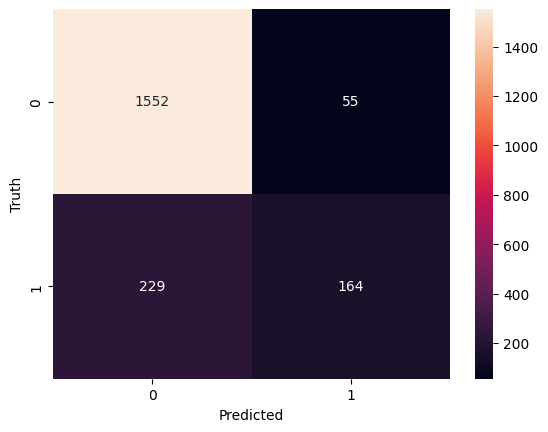

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
def ANN(X_train, y_train, X_test, y_test, loss):
  model = keras.Sequential([
      keras.layers.Dense(8, input_shape=(12,), activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])

  model.fit(X_train, y_train, epochs=50)
  print(model.evaluate(X_test, y_test))
  y_pred = model.predict(X_test)
  y_preds = np.round(y_pred)
  print("Classification Report: \n", classification_report(y_test, y_preds))
  return y_preds

**Undersampling**

In [27]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,1,0,0
1,0.516,0,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,0,1
2,0.304,0,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,0,1


In [28]:
df1['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [44]:
not_exit_count, exit_count = df1['Exited'].value_counts()
not_exit_count, exit_count

(7963, 2037)

In [32]:
not_exit_df = df1[df1['Exited'] == 0]
exit_df = df1[df1['Exited'] == 1]

In [34]:
exit_df.shape

(2037, 13)

In [36]:
not_exit_df_under = not_exit_df.sample(exit_count)
not_exit_df_under.shape

(2037, 13)

In [38]:
under_df = pd.concat([not_exit_df_under, exit_df], axis=0)
under_df.shape

(4074, 13)

In [39]:
X = under_df.drop(columns=['Exited'])
y = under_df['Exited']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
y_train.value_counts()

,count
Exited,
1,1630
0,1629


In [42]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5326 - loss: 0.7046
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5613 - loss: 0.6905
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5743 - loss: 0.6792
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6242 - loss: 0.6590
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - loss: 0.6523
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.6313
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6484 - loss: 0.6278
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6841 - loss: 0.6103
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - loss: 0.6159
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - loss: 0.6140
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - loss: 0.6033
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

**Oversampling**

In [45]:
not_exit_count, exit_count

(7963, 2037)

In [46]:
exit_df_over = exit_df.sample(not_exit_count, replace=True)
exit_df_over.shape

(7963, 13)

In [47]:
over_df = pd.concat([not_exit_df, exit_df_over], axis=0)
over_df.shape

(15926, 13)

In [48]:
X = over_df.drop(columns=['Exited'])
y = over_df['Exited']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5754 - loss: 0.6792
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6507 - loss: 0.6373
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6685 - loss: 0.6190
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6894 - loss: 0.5953
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6978 - loss: 0.5785
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6985 - loss: 0.5744
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7198 - loss: 0.5514
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7325 - loss: 0.5421
Epoch 9/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7438 - loss: 0.5284
Epoch 10/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7498 - loss: 0.5194
Epoch 11/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7524 - loss: 0.5127
Epoch 12/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

**Applying SMOTE**

In [51]:
X = df1.drop(columns=['Exited'])
y = df1['Exited']

In [52]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

,count
Exited,
1,7963
0,7963


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [56]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5208 - loss: 0.6956
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6467 - loss: 0.6416
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6690 - loss: 0.6182
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6883 - loss: 0.5958
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6949 - loss: 0.5865
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7056 - loss: 0.5723
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7173 - loss: 0.5588
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7347 - loss: 0.5439
Epoch 9/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7415 - loss: 0.5308
Epoch 10/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7467 - loss: 0.5261
Epoch 11/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7584 - loss: 0.5072
Epoch 12/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

**Ensemble method**

In [57]:
not_exit_count, exit_count

(7963, 2037)

In [58]:
7963/2037

3.9091801669121256

In [60]:
not_exit_df.shape, exit_df.shape

((7963, 13), (2037, 13))

1990.75

In [64]:
def ensemble(start, end, majority, minority):
  ens_df = pd.concat([majority[start:end], minority], axis=0)
  X = ens_df.drop(columns=['Exited'])
  y = ens_df['Exited']
  return X, y

In [88]:
X, y = ensemble(0, 1990, not_exit_df, exit_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5193 - loss: 0.7368
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5929 - loss: 0.6740
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6063 - loss: 0.6590
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6406 - loss: 0.6372
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6558 - loss: 0.6302
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6762 - loss: 0.6109
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.6116
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6802 - loss: 0.6055
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - loss: 0.6005
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6909 - loss: 0.5936
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7034 - loss: 0.5883
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [89]:
X, y = ensemble(1990, 3980, not_exit_df, exit_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4851 - loss: 0.7092
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5610 - loss: 0.6829
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6177 - loss: 0.6652
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6489 - loss: 0.6460
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6559 - loss: 0.6351
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6404 - loss: 0.6379
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6644 - loss: 0.6216
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6741 - loss: 0.6135
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6840 - loss: 0.6080
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6768 - loss: 0.6056
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6840 - loss: 0.6004
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accurac

In [91]:
X, y = ensemble(3980, 5970, not_exit_df, exit_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5982 - loss: 0.6691
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6664 - loss: 0.6400
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6576 - loss: 0.6287
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6725 - loss: 0.6140
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.5923
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6848 - loss: 0.5970
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6930 - loss: 0.5797
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - loss: 0.5848
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.5656
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7050 - loss: 0.5793
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6921 - loss: 0.5745
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [92]:
X, y = ensemble(5970, 7960, not_exit_df, exit_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_pred4 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5020 - loss: 0.7550
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5145 - loss: 0.6945
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5909 - loss: 0.6763
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - loss: 0.6595
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 0.6434
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6466 - loss: 0.6413
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - loss: 0.6317
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.6245
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 0.6224
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.6173
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6648 - loss: 0.6157
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [93]:
len(y_pred1), len(y_pred2), len(y_pred3), len(y_pred4)

(806, 806, 806, 806)

**Uses voting for final prediction**

In [94]:
final_pred = y_pred1.copy()
for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i]
  if n_ones >= 2:
    final_pred[i] = 1
  else:
    final_pred[i] = 0

In [95]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       398
           1       0.74      0.76      0.75       408

    accuracy                           0.74       806
   macro avg       0.74      0.74      0.74       806
weighted avg       0.74      0.74      0.74       806

